# Import the revelant packages

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Task 1 - Generating some data

Generate and store random coefficients for a second degree polynomial $ y = ax^2+bx+c $

In [2]:
random.seed(19004788)
coefficients = random.sample(range(1,10),3)
coefficients

[8, 3, 4]

Define a second degree polynomial equation (ax2+bx+c), as the results of part (1), the equation is $ y = 8x^2+3x+4 $

In [3]:
p_e = np.poly1d(coefficients)

Give a series of $x$ and return the corresponding $y$

In [4]:
n = 100
np.random.seed(19004788)
x_sample = np.random.uniform(-10,10,n)
p_e(x_sample)

array([ 86.24505988,  15.37942519,   3.80934948, 727.63389082,
       514.37951276,   5.09440076,   5.47151365, 270.04087644,
       472.47225249, 407.73727307, 238.49082149,  87.31028273,
       273.63636798,   5.51082653,  20.89419317, 747.65282975,
       318.59714481, 343.65554007, 648.7812989 , 129.21583432,
       489.70431349,   9.26442268, 281.95691658,  39.74965693,
       110.3595265 , 451.76985924, 209.63485714, 320.30089677,
       304.69911867, 242.6443762 , 321.38894478,  20.38611636,
       108.22538843, 225.5088211 , 356.62445233,   5.16575502,
         5.09188063,  78.49969052, 644.7032039 , 422.11051574,
       151.45266356, 643.22761896, 537.04744823, 140.31073903,
       196.03158836,   8.54287087, 197.13155743,  81.87200468,
         7.22520651,   7.52118517,  31.42062714,  26.88061962,
       102.11904108, 555.44013836, 156.3031087 , 264.72257281,
       744.71669739, 356.34154875, 218.16996624,  30.01127937,
        12.53896709, 129.33300473, 107.16239094, 542.90

Create a vector of noise

In [5]:
jitter = 20   # set a jitter value
interval_min = p_e(x_sample)-jitter
interval_max = p_e(x_sample)+jitter

y_hat = []
for i in range(n):
    r = np.random.uniform(interval_min[i], interval_max[i],1)
    y_hat.append(r[0])

Store those matching $x$ and $y$ values as you see fit.

In [6]:
X = x_sample
Y = y_hat

Plot

In [7]:
plt.plot(X, Y,'.', color = 'black')
plt.grid(b=True, which='major',color='0.6', linestyle=':', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Training Data')
plt.show()

# Task 2 - Loss

Generate and store random coefficients for a second degree polynomial $y = ax^2+bx+c$

In [8]:
random.seed(12345)
coefficients_1 = random.sample(range(1,10),3)
coefficients_1

[7, 1, 9]

Define a second degree polynomial equation $y=ax^2+bx+c$, as the results of previous part,the equation is $y = 7x^2+x+9$

In [9]:
model = np.poly1d(coefficients_1)

Model's predicted $\bar{y}$

In [10]:
Ybar = model(X)

Plot

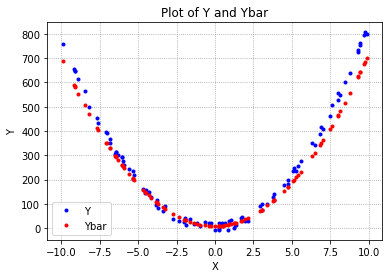

In [11]:
plt.plot(X, Y,'.', color = 'blue', label = 'Y')
plt.plot(X, Ybar,'.', color = 'red', label = 'Ybar')
plt.grid(b=True, which='major',color='0.6', linestyle=':', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Y and Ybar')
plt.legend()
plt.show()

Create a mean squared error

In [12]:
def MSE(x,y):
    result = sum((x - y)**2)/n
    return result
MSE(Y, Ybar)

1995.3841862496336

As the plot, the predict values from the model are drawn as red nodes and the true values are in blue. We can see that the predict values and true value have certain difference. Meanwhile, the MSE is not that high. Hence, this is a good model but it can be improve in further.

# Task 3 - Gradient calculation and loss reduction

Loss Function:

$$ \begin{aligned}
MSE &= \frac{\sum_{i=1}^{n} {(y_{i} - \bar{y_{i}})^2}}{n} \\
&= \frac{\sum_{i=1}^{n} {(y_{i} - \bar{a}x_{i}^2 - \bar{b}x_{i} - \bar{c})}}{n} 
\end{aligned} \tag{1}$$

Therefore, the partial derivatives of your loss function with respect to each individual coefficient are listed below:

$$ \begin{aligned}
\frac{\partial{MSE}}{\partial{\bar{a}}} = \frac{-2}{n}\sum\limits_{i=1}^{n}{x_i^2[y_i -(\bar{a}x_i^2+\bar{b}x_i+\bar{c})]}
\end{aligned} \tag{2}$$ <br>

$$ \begin{aligned}
\frac{\partial{MSE}}{\partial{\bar{b}}} = \frac{-2}{n}\sum\limits_{i=1}^{n}{x_i[y_i-(\bar{a}x_i^2+\bar{b}x_i+\bar{c})]}
\end{aligned} \tag{3}$$ <br>

$$ \begin{aligned}
\frac{\partial{MSE}}{\partial{\bar{c}}} = \frac{-2}{n}\sum\limits_{i=1}^{n}{[y_i-(\bar{a}x_i^2+\bar{b}x_i+\bar{c})]}
\end{aligned} \tag{4}$$

Define functions to calculate gradients:

In [13]:
def gradient_a(x,y_true,y_pred):
    return (-2/len(x)) * sum(x**2 * (y_true - y_pred))

def gradient_b(x,y_true,y_pred):
    return (-2/len(x)) * sum(x * (y_true - y_pred))

def gradient_c(x,y_true,y_pred):
    return (-2/len(x)) * sum(y_true - y_pred)

In [23]:
def loss_decrease_coef(coef, x, y_true, lr = 0.0001):
    poly = np.poly1d(coef)
    y_pred = poly(x)
    
    # calculate gradients
    ga = gradient_a(x, y_true, y_pred)
    gb = gradient_b(x, y_true, y_pred)
    gc = gradient_c(x, y_true, y_pred)
    
    # updated values 
    a_new = coef[0] - lr*ga
    b_new = coef[1] - lr*gb
    c_new = coef[2] - lr*gc
    
    coef_new = (a_new, b_new, c_new)
    
    return coef_new

coefficients_2 = loss_decrease_coef(coefficients_1, X, Y)
poly_2 = np.poly1d(coefficients_2)
Ybar_2 = poly_2(X)
MSE_2 = MSE(Y, Ybar_2)

print('coefficients_2 = ', coefficients_2)
print('MSE_2 = ', MSE_2)

coefficients_2 =  (7.357438514130207, 1.016945522065673, 9.005447223877907)
MSE_2 =  954.5241910755617


The updated coefficients are $ a_{new} = 7.357438514130207, b_{new} = 1.016945522065673, c_{new} = 9.005447223877907$. <br>

The updated MSE is $954.5241910755617$, which is much samller than $1995.3841862496336$

Now, plot the true Y value and two models:

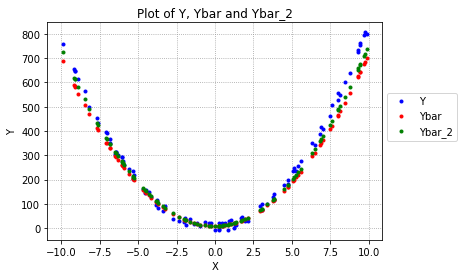

In [45]:
plt.plot(X, Y,'.', color = 'blue', label = 'Y')
plt.plot(X, Ybar,'.', color = 'red', label = 'Ybar')
plt.plot(X, Ybar_2,'.', color = 'green', label = 'Ybar')
plt.grid(b=True, which='major',color='0.6', linestyle=':', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Y, Ybar and Ybar_2')
plt.legend(['Y', 'Ybar', 'Ybar_2'], bbox_to_anchor =(1, 0.7), ncol = 1)
plt.show()

As the plot shows, the new model fits better than the original model.

# Task 4 - Gradient descent

In [133]:
i = 0
coefficient_sets = [coefficients_1]  #Initialise the coefficient sets
MSE_sets = [MSE(Y, Ybar)]            #Initialise the MSE sets
    
while i <= 1000:
    coefficient_new = loss_decrease_coef(coefficient_sets[i], X, Y)  #Get the new coefficients
    poly_new = np.poly1d(coefficient_new)                            #New model
    Ybar_new = poly_new(X)                                           #New predicted y value
    MSE_new = MSE(Y, Ybar_new)                                       #New MSE
    coefficient_sets.append(list(coefficient_new))                   #Append the new coefficients into the coefficient sets
    MSE_sets.append(MSE_new)                                         #Append the new MSE into the MSE sets
    if (MSE_sets[i] - MSE_sets[i+1]) < 0.01 :                        #Choose and implement a condition to decide when to stop iterating
        break
    i = i+1
print('The times of iterations is:', i+1)                              #Return the times of iterations when that condition is met

The times of iterations is: 429


Plot the loss value over iterations.

Text(0.5, 1.0, 'Loss Value over Iterations')

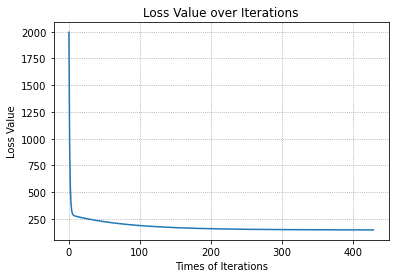

In [129]:
plt.plot(MSE_sets)
plt.grid(b=True, which='major',color='0.6', linestyle=':', )
plt.xlabel('Times of Iterations')
plt.ylabel('Loss Value')
plt.title('Loss Value over Iterations')

Plot both your actual $x$ and $y$ training data and $x$ and $\bar{y}$ predicted data in the final selected model.

In [147]:
coefficient_final = coefficient_sets[-1]
poly_final = np.poly1d(coefficient_final)
Ybar_final = poly_final(X)
plt.plot(X, Y,'.', color = 'blue', label = 'Y')
plt.plot(X, Ybar_final,'.', color = 'red', label = 'Ybar')
plt.grid(b=True, which='major',color='0.6', linestyle=':', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Y and Final Predicted Y')
plt.legend(['Y', 'Ybar'], bbox_to_anchor =(1, 0.7), ncol = 1)
plt.show()

In [154]:
print('Final MSE =', MSE_sets[-1])
print('Final Coefficients =', coefficient_final)
print('True Coefficients =', coefficients)

Final MSE = 146.67955253240856
Final Coefficients = [7.937134880462552, 3.0036501335195096, 8.807575232399616]
True Coefficients = [8, 3, 4]


Above all, we can see the final model fits the data very well. The loss value is $146.67955253240856$. The final coefficients are $\bar{a} = 7.937134880462552$, $\bar{b} = 3.0036501335195096$ and $\bar{c} = 8.807575232399616$. Compared with the true coefficients $a = 8$, $b = 3$ and $c = 4$, the $\bar{a}$ and $\bar{b}$ are extremely cloesd to the true values while $\bar{c}$ is nearly two times of the true value. 